# ADVANCES IN SYSTEMS AND SYNTHETIC BIOLOGY 
## Modelling Complex Biological Systems in the Context of Genomics 
## Thematic Research School

https://assb.lri.fr 20 March 2018

# Workshop on the BIOCHAM modeling environment

François Fages and Sylvain Soliman, Inria Saclay Ile de France,
[ASSB BIOCHAM workshop](https://assb.lri.fr/en/Abstracts/BIOCHAM.html)

# Minimal mitotic oscillator
after *[Albert Goldbeter 1991 PNAS](https://doi.org/10.1073/pnas.88.20.9107)*

<img src="oscillator.png" width=300>


In [1]:
load(oscillator.bc).

In [2]:
list_model.

vi for _=>Cyclin.
kd*Cyclin for Cyclin=>_.
Kinase*V2/(K2+Kinase) for Kinase=>KinaseP.
VM1*KinaseP/(K1+KinaseP)*Cyclin/(Kc+Cyclin) for Cyclin+KinaseP=>Cyclin+Kinase.
Kinase*Protease*VM3/(K3+Protease) for Kinase+Protease=>Kinase+ProteaseP.
ProteaseP*V4/(K4+ProteaseP) for ProteaseP=>Protease.
vd*Cyclin/(Kd+Cyclin)*ProteaseP for Cyclin+ProteaseP=>ProteaseP.
present(Cyclin,0.01).
present(Kinase,0.01).
present(ProteaseP,0.01).
present(KinaseP,0.99).
present(Protease,0.99).
parameter(
  VM1 = 3,
  VM3 = 1,
  Kc = 0.5,
  vi = 0.025,
  kd = 0.01,
  vd = 0.25,
  Kd = 0.02,
  K1 = 0.005,
  V2 = 1.5,
  K2 = 0.005,
  K3 = 0.0051,
  K4 = 0.005,
  V4 = 0.5
).


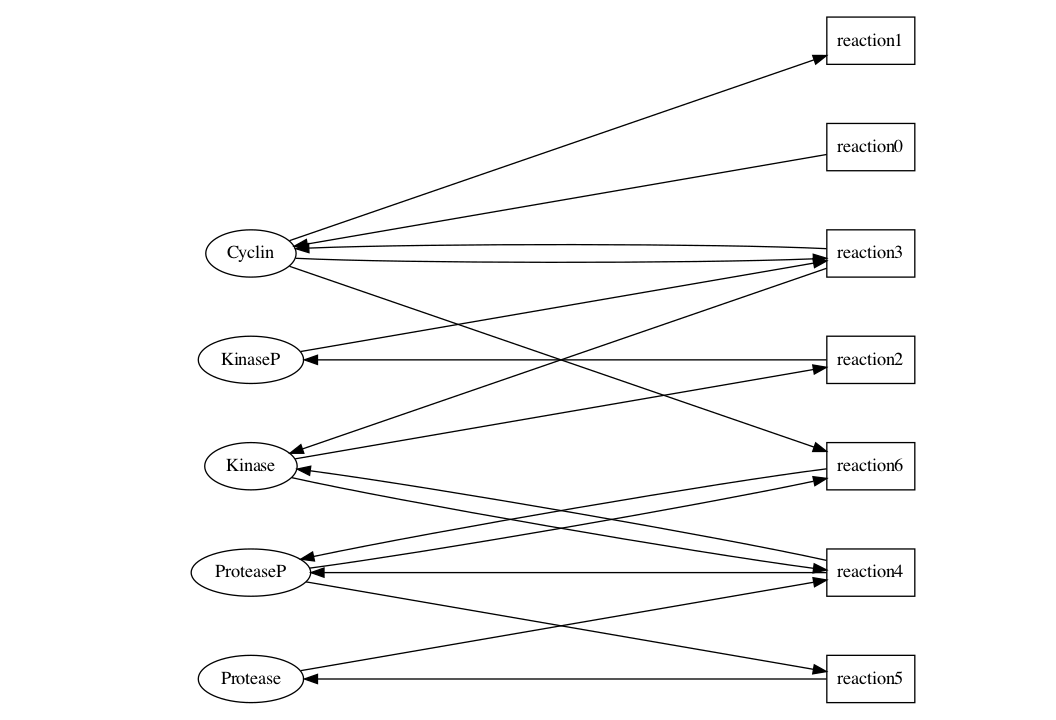

In [3]:
draw_reactions.

**Question:** _Do you think this system can oscillate? Does it have a_ **negative feedback loop**?

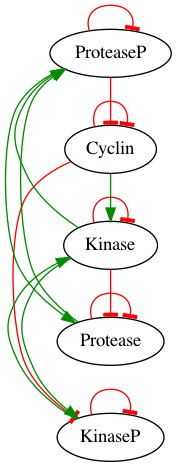

In [4]:
draw_influences.

**Question:** _Can you find which species are (mass-)conserved in this system?_

In [5]:
search_conservations.

Kinase+KinaseP
Protease+ProteaseP
2 complex invariant(s)


## Differential semantics
Ordinary differential equations (ODEs) on continuous molecular concentrations

In [6]:
list_ode.

In [7]:
numerical_simulation. plot.

In [8]:
plot(show:Cyclin, against:ProteaseP).

**Question:** _Can you find parameter values that increase or decrease Cyclin's period?_

In [9]:
%slider vi kd V2 K2

Box(children=(SelectionSlider(continuous_update=False, description='vi', index=10, layout=Layout(min_width='30…

## Stochastic semantics
Continuous time Markov Chain (CTMC) on integer numbers of molecules (conversion factor 100 for concentration 1)

In [10]:
parameter(vi=0.025, kd=0.01, V2=1.5, K2=0.005).

In [11]:
numerical_simulation(method:ssa). plot.

## Boolean semantics
Non-deterministic asynchronous Boolean transition system on Boolean states of present/absent molecules

## Computation Tree Logic (CTL) for querying the Boolean transition paths.

Logical connectives: /\ (and), \/ (or), not (negation), -> (implication)

Path quantifiers: E (there exists a path), A (for all paths)

Time operators: F (finally at some time point), G (globally at all time points), U (until)

Example: reachable state EF(s), steady state EG(s), stable state AG(s), etc.

In [12]:
generate_ctl.

reachable(steady(Cyclin))
reachable(steady(Kinase))
reachable(steady(KinaseP))
reachable(steady(Protease))
reachable(steady(ProteaseP))
oscil(Cyclin)
oscil(Kinase)
oscil(KinaseP)
oscil(Protease)
oscil(ProteaseP)


In [13]:
expand_ctl(reachable(s)).

EF(s)


In [14]:
expand_ctl(steady(s)).

EG(s)


In [15]:
expand_ctl(stable(s)).

AG(s)


In [16]:
expand_ctl(oscil(f)).

EU(not f,f/\EU(f,not f/\EU(not f,f/\EU(f,not f/\EU(not f,f)))))/\EG(EF(f)/\EF(not f))


## Model reduction preserving CTL properties
Which reactions can be removed while preserving the (generated) CTL specification of the behavior ?

In [17]:
reduce_model.

removed:
kd*Cyclin for Cyclin=>_


In [18]:
numerical_simulation. plot.

In [19]:
load(oscillator.bc).

In [20]:
numerical_simulation. plot.

## Linear Time Logic with Constraints over Reals FO-LTL(Rlin)

No path quantifier (single trace analysis)

Only temporal operators F, G, U, X (next)

Free variables over the reals 

Linear constraints over real variables

Existential (exists) and universal (forall) quantifiers over real variables

In [21]:
validity_domain(amplitude(Cyclin,v)).

v=0.571429


In [22]:
expand_ltl(amplitude(x,a)).

exists(Minimum,exists(Maximum,G(x<=Maximum)/\F(x>=Maximum)/\(G(x>=Minimum)/\F(x<=Minimum))/\a=Maximum-Minimum))


In [23]:
validity_domain(period(Cyclin,p)).

p=24.683\/p=25.6741


In [24]:
satisfaction_degree(period(Cyclin,p), [p->25]).

0.759301


In [25]:
satisfaction_degree(period(Cyclin,p), [p->22]).

0.271518


## Parameter search

In [26]:
seed(0). search_parameters(period(Cyclin,p), [0<=vi<=1, 0<=V2<=2], [p -> 22]).

Time: 3.368 s
Stopping reason: Fitness: function value 0.00e+00 <= stopFitness (1.00e-04)
Best satisfaction degree: 1.0
[0] parameter(vi=0.19881839237341953)
[1] parameter(V2=1.690391552930099)


In [27]:
list_parameters.

[0] parameter(VM1=3)
[1] parameter(VM3=1)
[2] parameter(Kc=0.5)
[3] parameter(kd=0.01)
[4] parameter(vd=0.25)
[5] parameter(Kd=0.02)
[6] parameter(K1=0.005)
[7] parameter(K2=0.005)
[8] parameter(K3=0.0051)
[9] parameter(K4=0.005)
[10] parameter(V4=0.5)
[11] parameter(vi=0.19881839237341953)
[12] parameter(V2=1.690391552930099)


In [28]:
numerical_simulation. plot.

In [29]:
validity_domain(period(Cyclin,p)).

p=22.87243\/p=21.8096\/p=22


---
Let's now have a closer look at the amplitude of the _Cyclin_…

In [30]:
plot(show: Cyclin).

In [31]:
validity_domain(amplitude(Cyclin, amp)).

amp=1.25074


**Question:** _Does this formula capture the amplitude between peaks?_

_Using the_ `local_minimum(Species, min)` _and_ `local_maximum(Species, max)` _constructs, can you write a pattern to capture that?_ 

In [32]:
expand_ltl(local_minimum(x,m)).

F(x>m/\X(x<=m/\X(x>=m)))


In [33]:
ltl_pattern(peak_amplitude(Species, Amplitude) =
    exists(min, exists(max, local_minimum(Species, min) /\ local_maximum(Species, max) /\ Amplitude <= max - min))).

In [34]:
validity_domain(peak_amplitude(Cyclin, amp)).

amp<=0.785813


In [35]:
seed(0). search_parameters(peak_amplitude(Cyclin, amp), [0<=vi<=1, 0<=V2<=2], [amp -> 0.8]).

Time: 2.568 s
Stopping reason: Fitness: function value -7.50e-02 <= stopFitness (1.00e-04)
Best satisfaction degree: 1.081123
[0] parameter(vi=0.2205371491781521)
[1] parameter(V2=1.8977084243637647)


In [36]:
option(show: {Cyclin, Protease, Kinase}).

In [37]:
numerical_simulation. plot.

In [38]:
validity_domain(peak_amplitude(Cyclin, amp)).

amp<=0.88112


## Robustness of the model w.r.t. an FO-LTL(Rlin) property and parameter perturbations
* Model robustness (mean satisfaction degree for normal distribution of the parameter values)
* Formula satisfaction robustness optimization (maximization of the penetration depth in the validity domain)

In [39]:
robustness(peak_amplitude(Cyclin, amp), [vi, V2], [amp -> 0.8]).

Time: 3.59 s
Robustness degree: 0.883316


In [40]:
seed(0). search_parameters(peak_amplitude(Cyclin, amp), [0<=vi<=1, 0<=V2<=2], [amp -> 0.8], cmaes_stop_fitness: -0.1).

Time: 5.037 s
Stopping reason: Fitness: function value -1.12e-01 <= stopFitness (-1.00e-01)
Best satisfaction degree: 1.126019
[0] parameter(vi=0.1603896426817486)
[1] parameter(V2=1.990814002539743)


In [41]:
numerical_simulation. plot.

In [42]:
validity_domain(peak_amplitude(Cyclin, amp)).

amp<=0.926015


In [43]:
robustness(peak_amplitude(Cyclin, amp), [vi, V2], [amp -> 0.8]).

Time: 3.548 s
Robustness degree: 0.994933


In [44]:
validity_domain(period(Cyclin, p)).

p=18.6842\/p=18.827\/p=18.8103\/p=18.9115


## Synthesis of continuous Biochemical Reaction Networks for Real Functions
* Definition of computable real functions by polynomial initial value problems (PIVPs)
* Synthesis of continuous CRNs from PIVPs (showing Turing completeness of PIVPs)

Synthesis of CRNs for the cosine function as a function of time or of an input x

In [45]:
clear_model.

In [46]:
compile_from_expression(cos,time,f).

In [47]:
list_model.

MA(fast) for f_m+f_p=>_.
MA(fast) for A_m+A_p=>_.
MA(1.0) for A_p=>A_p+f_p.
MA(1.0) for A_m=>A_m+f_m.
MA(1.0) for f_m=>A_p+f_m.
MA(1.0) for f_p=>A_m+f_p.
present(f_p,1).
parameter(
  fast = 1000
).


In [48]:
option(time:10). numerical_simulation. plot.

In [49]:
numerical_simulation(method:ssa). plot.

In [50]:
clear_model.

In [51]:
compile_from_expression(cos,x,f).

In [52]:
list_model.

MA(fast) for f_m+f_p=>_.
MA(fast) for A_m+A_p=>_.
MA(1.0) for A_p+x=>A_p+f_p+x.
MA(1.0) for A_m+x=>A_m+f_m+x.
MA(1.0) for f_m+x=>A_p+f_m+x.
MA(1.0) for f_p+x=>A_m+f_p+x.
MA(1.0) for x=>_.
present(f_p,1).
present(x,input).
parameter(
  input = 1.0,
  fast = 1000
).


In [53]:
present(x_p,4).

In [54]:
numerical_simulation. plot.

In [55]:
seed(0). numerical_simulation(method:ssa). plot.

In [56]:
dose_response(x_p, 0, 6.28, show:{f_p, f_m}).

## Subsidiary question
Implement the cos(time) function with activation reactions (e.g. by phosphorylation) instead of synthesis reactions 

Propose a deactivation scheme for the annihilation reactions.